In [1]:
import pandas as pd  
import numpy as np
import math


# Subject : Based on this Marketing Campaign Data, I would like to know the Customer behaviour based on Generation Type (Baby Boomers, Generation X & Millenial)and try to predict their acceptance for new marketing campaign (0 = reject, 1 = accept)

In [2]:
# Data source : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
display(data.head())
data.shape

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


(2240, 29)

In [4]:
pd.set_option('display.max_columns', None)
print(data.shape)
data.head()

(2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
# People

# ID: Customer's unique identifier
# Year_Birth: Customer's birth year
# Education: Customer's education level
# Marital_Status: Customer's marital status
# Income: Customer's yearly household income
# Kidhome: Number of children in customer's household
# Teenhome: Number of teenagers in customer's household
# Dt_Customer: Date of customer's enrollment with the company
# Recency: Number of days since customer's last purchase


In [6]:
# Products

# MntWines: Amount spent on wine in last 2 years
# MntFruits: Amount spent on fruits in last 2 years
# MntMeatProducts: Amount spent on meat in last 2 years
# MntFishProducts: Amount spent on fish in last 2 years
# MntSweetProducts: Amount spent on sweets in last 2 years
# MntGoldProds: Amount spent on gold in last 2 years


In [7]:
# Place

# NumDealsPurchases: Number of purchases made with a discount
# NumWebPurchases: Number of purchases made through the company’s website
# NumCatalogPurchases: Number of purchases made using a catalogue
# NumStorePurchases: Number of purchases made directly in stores
# NumWebVisitsMonth: Number of visits to company’s website in the last month


In [8]:
# Promotion

# AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
# AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
# AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
# AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
# AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise


In [9]:
# Others

# Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# Z_CostContact: There is no info regarding this column  !!!
# Z_Revenue:There is no info regarding this column !!!
# Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


# Data Cleaning

# 1. Checking of Column types

In [10]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [11]:
data['Z_CostContact'].value_counts(dropna=False)

3    2240
Name: Z_CostContact, dtype: int64

In [12]:
data['Z_Revenue'].value_counts(dropna=False)

11    2240
Name: Z_Revenue, dtype: int64

# Resume : Based on the info that there is data explication regarding this 2 columns and they have the same info (Z_CostContact only 3 and Z_Revenue' only 11) so I decided to drop them as it will not affected the results


In [13]:
data2 = data.drop(['Z_CostContact','Z_Revenue'],axis=1)
data2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


# 2. Column Name cleaning (lower case & underscore)

In [14]:
cols = []
for i in range(len(data2.columns)):
    cols.append(data2.columns[i].lower().replace(' ', '_'))
data2.columns = cols

print(data2.columns)

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'response'],
      dtype='object')


In [15]:
data2.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


# 3. Checking Missing data

In [16]:
data2.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
response                0
dtype: int64

In [17]:
mean_income=data2['income'].mean()
mean_income

52247.25135379061

In [18]:
data2['income'] = data2['income'].fillna(mean_income)

In [19]:
data2.isna().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
response               0
dtype: int64

# Resume : Replace 24 rows missing in Income Column by using mean of the Income

# 4. Checking Duplicates

In [20]:
duplicate_rows = data2[data2.duplicated()]
duplicate_rows

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response


# Resume : There is no duplication in the data frame

# 5. Checking Marital Status Column

In [21]:
data2['marital_status'].value_counts(dropna=False)

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: marital_status, dtype: int64

In [22]:
value_mapping = {
    'Married': 'relation',
    'Together': 'relation',
    'Single': 'single',
    'Divorced': 'single',
    'Widow': 'single',
    'Alone': 'single',
    'Absurd': 'single',
    'YOLO': 'single',}

data2['marital_status'] = data2['marital_status'].replace(value_mapping)

In [23]:
data2['marital_status'].value_counts(dropna=False)

relation    1444
single       796
Name: marital_status, dtype: int64

# Resume : Simplify the Marital Status into relation & single

# 6. Checking Education Columns

In [24]:
data2['education'].value_counts(dropna=False)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: education, dtype: int64

In [25]:
data2['education'] = data2['education'].replace({'Graduation':'graduate','PhD':'post_graduate','Master':'post_graduate',
                                                 '2n Cycle':'post_graduate','Basic':'under_graduate'})

In [26]:
data2['education'].value_counts(dropna=False)

graduate          1127
post_graduate     1059
under_graduate      54
Name: education, dtype: int64

# Resume : Simplify the education into 3 category (graduate, post_graduate, under_graduate)

# 7. Checking Kidhome and Teenhome Columns

In [27]:
data2['kidhome'].value_counts(dropna=False)

0    1293
1     899
2      48
Name: kidhome, dtype: int64

In [28]:
data2['teenhome'].value_counts(dropna=False)

0    1158
1    1030
2      52
Name: teenhome, dtype: int64

In [29]:
data2['children'] = data2['kidhome'] + data2['teenhome']


In [30]:
data2['children'].value_counts(dropna=False)

1    1128
0     638
2     421
3      53
Name: children, dtype: int64

# Resume : Simplify both Kidhome and Teenhome Columns into Children Column as I just want to see if the impact of having children will impact the customer behaviour

# 8. Combining some column that have the same info (Expenses, Purchased & Acceptance of Campaigns)

In [31]:
data2['mntwines'].value_counts(dropna=False)

2       42
5       40
1       37
6       37
4       33
        ..
806      1
61       1
986      1
1230     1
428      1
Name: mntwines, Length: 776, dtype: int64

In [32]:
data2['expenses'] = data2['mntwines'] + data2['mntfruits'] + data2['mntmeatproducts'] + data2['mntfishproducts']+ data2['mntsweetproducts'] + data2['mntgoldprods']
 

In [33]:
print('Expenses Min = ', data2['expenses'].min())
print('Expenses Max = ', data2['expenses'].max())
print('Expenses Avg = ', data2['expenses'].mean())

Expenses Min =  5
Expenses Max =  2525
Expenses Avg =  605.7982142857143


In [34]:
data2['numdealspurchases'].value_counts(dropna=False)

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: numdealspurchases, dtype: int64

In [35]:
data2['purchases'] = data2['numdealspurchases'] + data2['numwebpurchases'] + data2['numcatalogpurchases'] + data2['numstorepurchases']+ data2['numwebvisitsmonth'] 


In [36]:
print('Purchases Min = ', data2['purchases'].min())
print('Purchases Max = ', data2['purchases'].max())
print('Purchases Avg = ', data2['purchases'].mean())

Purchases Min =  0
Purchases Max =  46
Purchases Avg =  20.178571428571427


In [37]:
data2['acceptedcmp1'].value_counts(dropna=False)

0    2096
1     144
Name: acceptedcmp1, dtype: int64

In [38]:
data2['acceptcmpg'] = data2['acceptedcmp1'] + data2['acceptedcmp2'] + data2['acceptedcmp3'] + data2['acceptedcmp4']+ data2['acceptedcmp5'] 


In [39]:
data2['acceptcmpg'].value_counts(dropna=False)

0    1777
1     325
2      83
3      44
4      11
Name: acceptcmpg, dtype: int64

In [40]:
data2['acceptcmpg'] = data2['acceptcmpg'].replace({2:1, 3:1, 4:1})

In [41]:
data2['acceptcmpg'].value_counts(dropna=False)

0    1777
1     463
Name: acceptcmpg, dtype: int64

# Resume : 
# 1. On this stage, all I want to know would be the reaction from the consumer so I only need the total of their purchases, expenses and acceptance of campaign 
# 2. There are 3 New Columns for expenses, purchases and acceptcampg so the dimension can be simplify later on
# 3. In the acceptcampg column, I just need to need to know if the customer reject the campaign = 0 and accept campaign = 1

# 9. Making Generation Columns with criteria below :
# a. Builder (before 1946)
# b. Baby boomers (1946-1964)
# c. Gen X (1965-1979)
# d. Millennial (1980-1995)
# e. Gen Z (1996-2010) 

In [42]:
# Define a function to categorize generations
def categorize_generation(year):
    if year < 1946:
        return 'Builder'
    elif 1946 <= year <= 1964:
        return 'Baby_boomers'
    elif 1965 <= year <= 1979:
        return 'Gen_X'
    elif 1980 <= year <= 1995:
        return 'Millennial'
    elif 1996 <= year <= 2010:
        return 'Gen_Z'
    else:
        return 'Unknown'

data2['generation'] = data2['year_birth'].apply(categorize_generation)
data2.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,children,expenses,purchases,acceptcmpg,generation
0,5524,1957,graduate,single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,32,0,Baby_boomers
1,2174,1954,graduate,single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,11,0,Baby_boomers
2,4141,1965,graduate,relation,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,25,0,Gen_X
3,6182,1984,graduate,relation,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,14,0,Millennial
4,5324,1981,post_graduate,relation,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,24,0,Millennial


In [43]:
data2['generation'].value_counts(dropna=False)

Gen_X           1030
Baby_boomers     759
Millennial       422
Builder           27
Gen_Z              2
Name: generation, dtype: int64

# 10. Date Checking

In [44]:
data2['dt_customer'].value_counts(dropna=False)

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: dt_customer, Length: 663, dtype: int64

In [45]:
data2['dt_customer'] = pd.to_datetime(data2['dt_customer'], errors='coerce')
data2['first_day'] = '01-01-2024'
data2['first_day'] = pd.to_datetime(data2['first_day'], errors='coerce')
data2['years'] = (data2['first_day'] - data2['dt_customer']).dt.days/365


/var/folders/g1/6jtlrdq10tl135qr36s2z_vh0000gn/T/ipykernel_12131/809519360.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data2['dt_customer'] = pd.to_datetime(data2['dt_customer'], errors='coerce')


In [46]:
# Round the 'years_engaged' column to zero decimal places
data2['years'] = data2['years'].round(0)
data2.head()

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,children,expenses,purchases,acceptcmpg,generation,first_day,years
0,5524,1957,graduate,single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0,1617,32,0,Baby_boomers,2024-01-01,12.0
1,2174,1954,graduate,single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,2,27,11,0,Baby_boomers,2024-01-01,9.0
2,4141,1965,graduate,relation,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0,776,25,0,Gen_X,2024-01-01,10.0
3,6182,1984,graduate,relation,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1,53,14,0,Millennial,2024-01-01,9.0
4,5324,1981,post_graduate,relation,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1,422,24,0,Millennial,2024-01-01,10.0


In [47]:
data2['years'].value_counts(dropna=False)

10.0    1036
11.0    1005
9.0      105
12.0      94
Name: years, dtype: int64

# Resume : For this dt_customer Columns, I try to know how long this customer have enggaged with the company by comparing their register date with Jan 1, 2024. And I have checked that they are mostly loyal customer (9 to 12 years)

# 11. Data Final with only column needed

In [48]:
data3 = data2[['generation','education','marital_status','income', 'children', 'expenses','purchases', 'recency', 'years', 'acceptcmpg' ]]
data3.head()

,generation,education,marital_status,income,children,expenses,purchases,recency,years,acceptcmpg
0,Baby_boomers,graduate,single,58138.0,0,1617,32,58,12.0,0
1,Baby_boomers,graduate,single,46344.0,2,27,11,38,9.0,0
2,Gen_X,graduate,relation,71613.0,0,776,25,26,10.0,0
3,Millennial,graduate,relation,26646.0,1,53,14,26,9.0,0
4,Millennial,post_graduate,relation,58293.0,1,422,24,94,10.0,0


In [49]:
data3.shape

(2240, 10)

# 12. Checking the Data final info

In [50]:
data3.describe().T

,count,mean,std,min,25%,50%,75%,max
income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0
children,2240.0,0.950446,0.751803,0.0,0.00,1.0,1.00,3.0
expenses,2240.0,605.798214,602.249288,5.0,68.75,396.0,1045.50,2525.0
purchases,2240.0,20.178571,7.293275,0.0,14.00,19.0,25.00,46.0
recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
years,2240.0,10.485714,0.653961,9.0,10.00,10.0,11.00,12.0
acceptcmpg,2240.0,0.206696,0.405026,0.0,0.00,0.0,0.00,1.0


# 13. Checking the disribution graph for columns

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


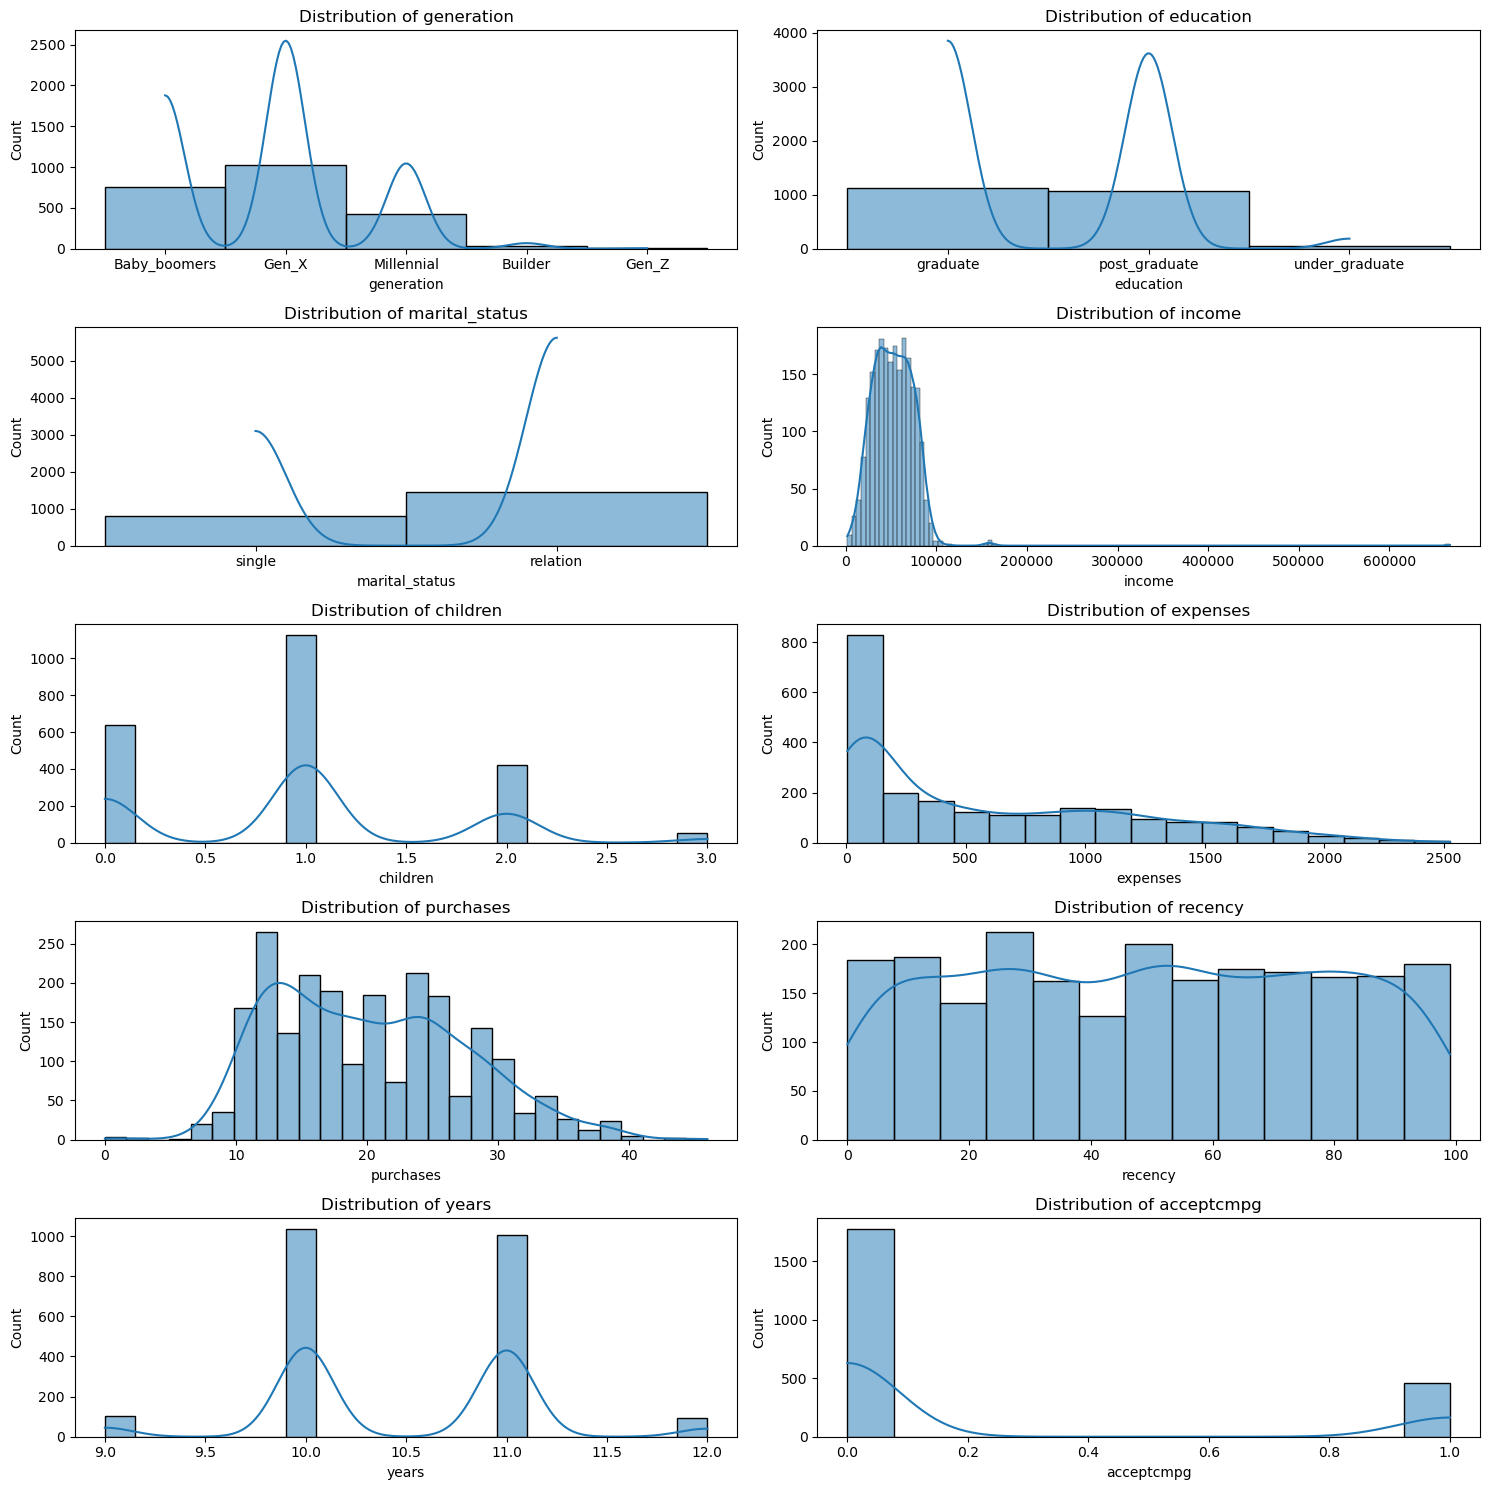

In [52]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot distribution for each column
for i, col in enumerate(data3.columns):
    sns.histplot(data=data3, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Resume : Based on distribution graph for all the variant, it seems that there are no really outlier for every variant. 

# 14. Split Categorical and Numerical Data

In [53]:
numerical_df = data3.select_dtypes(['number'])
numerical_df

,income,children,expenses,purchases,recency,years,acceptcmpg
0,58138.0,0,1617,32,58,12.0,0
1,46344.0,2,27,11,38,9.0,0
2,71613.0,0,776,25,26,10.0,0
3,26646.0,1,53,14,26,9.0,0
4,58293.0,1,422,24,94,10.0,0
...,...,...,...,...,...,...,...
2235,61223.0,1,1341,23,46,11.0,0
2236,64014.0,3,444,29,56,9.0,1
2237,56981.0,0,1241,25,91,10.0,1
2238,69245.0,1,843,26,8,10.0,0


In [54]:
categorical_df = data3.select_dtypes(object)
categorical_df

,generation,education,marital_status
0,Baby_boomers,graduate,single
1,Baby_boomers,graduate,single
2,Gen_X,graduate,relation
3,Millennial,graduate,relation
4,Millennial,post_graduate,relation
...,...,...,...
2235,Gen_X,graduate,relation
2236,Baby_boomers,post_graduate,relation
2237,Millennial,graduate,single
2238,Baby_boomers,post_graduate,relation


# 15. Correlation Matrix for Numerical Data

In [55]:
correlations_matrix = numerical_df.corr()
correlations_matrix

,income,children,expenses,purchases,recency,years,acceptcmpg
income,1.000000,-0.290712,0.664706,0.410085,-0.003946,-0.012514,0.262967
children,-0.290712,1.000000,-0.498888,-0.119509,0.018053,-0.042774,-0.218630
expenses,0.664706,-0.498888,1.000000,0.627152,0.020433,0.113985,0.416447
purchases,0.410085,-0.119509,0.627152,1.000000,-0.001093,0.243162,0.222911
recency,-0.003946,0.018053,0.020433,-0.001093,1.000000,0.035914,-0.015635
years,-0.012514,-0.042774,0.113985,0.243162,0.035914,1.000000,-0.026787
acceptcmpg,0.262967,-0.218630,0.416447,0.222911,-0.015635,-0.026787,1.000000


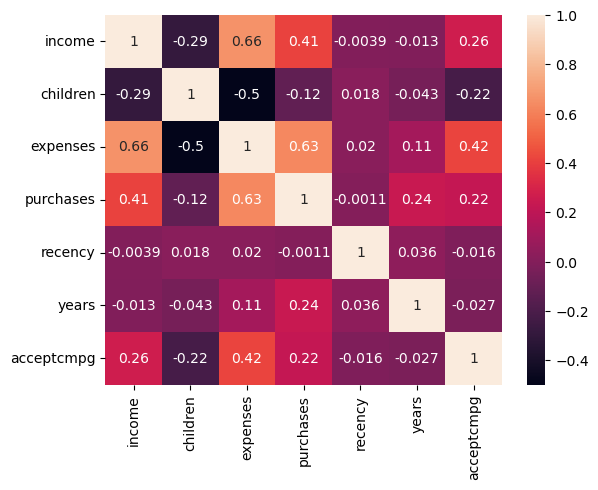

In [56]:
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Based on the graphc above, with Target as Acceptance of Marketing Campaign, I can see that Expenses (0.46) have high correlation with Target compare to others variable 

# 16. X,y Split 

In [57]:
y = data3['acceptcmpg']
X = data3.drop(['acceptcmpg'], axis = 1)

In [58]:
from sklearn.model_selection import train_test_split

# 17. Separate X_train and X_test into numerical and categorical

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print('X_train shape is:',X_train.shape)
print('y_train shape is:', y_train.shape)
print('X_test shape is:', X_test.shape)
print('y_test shape is:', y_test.shape)

X_train shape is: (1792, 9)
y_train shape is: (1792,)
X_test shape is: (448, 9)
y_test shape is: (448,)


In [60]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

In [61]:
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

# 18. Scaling the Numerical Data using MinMaxScaler 

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
# Creating transformer
transformer = MinMaxScaler().fit(X_train_num)

In [64]:
# Scaling
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num), columns=X_train_num.columns)
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num), columns=X_test_num.columns)

In [65]:
display(X_train_scaled.head())
display(X_test_scaled.head())

,income,children,expenses,purchases,recency,years
0,0.026745,0.666667,0.025397,0.391304,0.474747,0.333333
1,0.084530,0.333333,0.269048,0.500000,0.565657,0.333333
2,0.156017,0.000000,0.682143,0.717391,0.363636,0.666667
3,0.124056,0.000000,0.473413,0.413043,0.272727,0.333333
4,0.044550,0.666667,0.010317,0.304348,0.242424,0.333333


,income,children,expenses,purchases,recency,years
0,0.028952,0.000000,0.026984,0.326087,0.141414,0.666667
1,0.071863,0.333333,0.144444,0.434783,0.616162,0.333333
2,0.078959,0.333333,0.387302,0.739130,0.464646,0.666667
3,0.054849,0.333333,0.104365,0.500000,0.191919,0.666667
4,0.099841,0.333333,0.366270,0.630435,0.515152,0.333333


# 19. Scaling Categorical Data using Ordinal Encoder

In [66]:
ordinal_list = ['generation', 'education', 'marital_status']

In [67]:
# X train for ordinal encoding
X_train_cat["generation"] = X_train_cat["generation"].map({"Builder" : 0, "Baby_boomers" : 1, "Gen_X" : 2, \
                                                                          "Millennial" : 3, "Gen_Z" : 4})
X_train_cat["education"] = X_train_cat["education"].map({"under_graduate" : 0, "graduate" : 1, "post_graduate" : 2})
X_train_cat["marital_status"] = X_train_cat["marital_status"].map({"single" : 0, "relation" : 1})


In [68]:
X_train_cat.head()

,generation,education,marital_status
548,2,1,1
946,3,2,1
646,2,1,1
970,3,1,1
1614,2,1,1


In [69]:
# X test for ordinal encoding
X_test_cat["generation"] = X_test_cat["generation"].map({"Builder" : 0, "Baby_boomers" : 1, "Gen_X" : 2, \
                                                                          "Millennial" : 3, "Gen_Z" : 4})
X_test_cat["education"] = X_test_cat["education"].map({"under_graduate" : 0, "graduate" : 1, "post_graduate" : 2})
X_test_cat["marital_status"] = X_test_cat["marital_status"].map({"single" : 0, "relation" : 1})


In [70]:
X_test_cat.head()

,generation,education,marital_status
1514,2,2,1
864,2,2,0
1085,2,1,1
1575,1,2,1
1254,1,1,0


# 20. All data need to be reset before gather in Concaneting

In [71]:
# Resetting indexes because of the OneHot Encoded Dataframe
X_train_scaled = X_train_scaled.reset_index(drop = True)
X_test_scaled.reset_index(drop = True,inplace = True)

X_train_cat.reset_index(drop = True,inplace = True)
X_test_cat.reset_index(drop = True,inplace = True)

# 21. Merge all data that already encoded

In [72]:
X_train_processed = pd.concat((X_train_scaled, X_train_cat),axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_cat),axis=1)

In [73]:
print(X_train_processed.shape)
print(X_test_processed.shape)

(1792, 9)
(448, 9)


In [74]:
# Checking the X train types to make sure that they are all numbers
X_train_processed

,income,children,expenses,purchases,recency,years,generation,education,marital_status
0,0.026745,0.666667,0.025397,0.391304,0.474747,0.333333,2,1,1
1,0.084530,0.333333,0.269048,0.500000,0.565657,0.333333,3,2,1
2,0.156017,0.000000,0.682143,0.717391,0.363636,0.666667,2,1,1
3,0.124056,0.000000,0.473413,0.413043,0.272727,0.333333,3,1,1
4,0.044550,0.666667,0.010317,0.304348,0.242424,0.333333,2,1,1
...,...,...,...,...,...,...,...,...,...
1787,0.104345,0.333333,0.329365,0.652174,0.959596,0.333333,1,1,1
1788,0.090515,0.666667,0.034127,0.260870,0.838384,0.333333,2,2,1
1789,0.081686,0.000000,0.272619,0.630435,0.090909,0.666667,2,1,1
1790,0.078618,0.333333,0.228571,0.543478,0.424242,0.666667,3,1,1


In [75]:
X_test_processed

,income,children,expenses,purchases,recency,years,generation,education,marital_status
0,0.028952,0.000000,0.026984,0.326087,0.141414,0.666667,2,2,1
1,0.071863,0.333333,0.144444,0.434783,0.616162,0.333333,2,2,0
2,0.078959,0.333333,0.387302,0.739130,0.464646,0.666667,2,1,1
3,0.054849,0.333333,0.104365,0.500000,0.191919,0.666667,1,2,1
4,0.099841,0.333333,0.366270,0.630435,0.515152,0.333333,1,1,0
...,...,...,...,...,...,...,...,...,...
443,0.124589,0.000000,0.543651,0.804348,0.727273,0.666667,1,1,0
444,0.044907,0.333333,0.013095,0.282609,0.404040,0.666667,2,1,1
445,0.086207,0.333333,0.192857,0.500000,0.292929,0.333333,1,2,0
446,0.081718,0.333333,0.285714,0.543478,0.515152,0.333333,1,2,1


In [76]:
X_train_processed.dtypes

income            float64
children          float64
expenses          float64
purchases         float64
recency           float64
years             float64
generation          int64
education           int64
marital_status      int64
dtype: object

# 21. As the result are classification so out of curousity, I want to check with Linear Progression

In [77]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

In [78]:
# Fitting the model
lm.fit(X_train_processed,y_train)
# Making predictions
predictions = lm.predict(X_test_processed)

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

In [80]:
# Training Data
# R2-Score
predictions = lm.predict(X_train_processed)
r2score = round(r2_score(y_train, predictions), 2)
# Mean Square Error
mse= round(mean_squared_error(y_train,predictions))
# Root Mean Square Error
rmse = round(np.sqrt(mse), 2)
# Mean Absolute Error
mae = round(mean_absolute_error(y_train, predictions), 2)
# Test Data
# R2-Score
predictions = lm.predict(X_test_processed)
r2scoret = round(r2_score(y_test, predictions), 2)
# Mean Square Error
mset= round(mean_squared_error(y_test,predictions), 2)
# Root Mean Square Error
rmset = round(np.sqrt(mset), 2)
# Mean Absolute Error
maet = round(mean_absolute_error(y_test, predictions), 2)

In [81]:
display(pd.DataFrame({'ValType': ['Train', 'Test'], 'R2-Score': [r2score, r2scoret], 'MSE': [mse, mset] , 'RMSE': [rmse, rmset], 'MAE': [mae, maet]}))

,ValType,R2-Score,MSE,RMSE,MAE
0,Train,0.19,0.00,0.00,0.28
1,Test,0.15,0.12,0.35,0.26


# R2 Score result is so low only below 0.2 and it means that this data should not do the Linear Regression 
# As the result, we want to predict the acceptance of the customer (means classification) then I need to use Logistic Regression

# 22. Using Logistic Regression 

In [82]:
X_train = X_train_processed
X_test = X_test_processed


In [83]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print('training set score:{:3f}'.format(logreg.score(X_train,y_train)))
print('test set score:{:3f}'.format(logreg.score(X_test,y_test)))

training set score:0.815848
test set score:0.852679


In [84]:
from sklearn.metrics import confusion_matrix
prediction_train = logreg.predict(X_train)
prediction = logreg.predict(X_test)
confusion_matrix(y_test,prediction)  

array([[360,   9],
       [ 57,  22]])

In [85]:
prediction_train.shape

(1792,)

In [86]:
prediction.shape

(448,)

In [87]:
X_train['prediction'] = prediction_train
X_train

,income,children,expenses,purchases,recency,years,generation,education,marital_status,prediction
0,0.026745,0.666667,0.025397,0.391304,0.474747,0.333333,2,1,1,0
1,0.084530,0.333333,0.269048,0.500000,0.565657,0.333333,3,2,1,0
2,0.156017,0.000000,0.682143,0.717391,0.363636,0.666667,2,1,1,1
3,0.124056,0.000000,0.473413,0.413043,0.272727,0.333333,3,1,1,0
4,0.044550,0.666667,0.010317,0.304348,0.242424,0.333333,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...
1787,0.104345,0.333333,0.329365,0.652174,0.959596,0.333333,1,1,1,0
1788,0.090515,0.666667,0.034127,0.260870,0.838384,0.333333,2,2,1,0
1789,0.081686,0.000000,0.272619,0.630435,0.090909,0.666667,2,1,1,0
1790,0.078618,0.333333,0.228571,0.543478,0.424242,0.666667,3,1,1,0


In [88]:
X_test['prediction'] = prediction
X_test

,income,children,expenses,purchases,recency,years,generation,education,marital_status,prediction
0,0.028952,0.000000,0.026984,0.326087,0.141414,0.666667,2,2,1,0
1,0.071863,0.333333,0.144444,0.434783,0.616162,0.333333,2,2,0,0
2,0.078959,0.333333,0.387302,0.739130,0.464646,0.666667,2,1,1,0
3,0.054849,0.333333,0.104365,0.500000,0.191919,0.666667,1,2,1,0
4,0.099841,0.333333,0.366270,0.630435,0.515152,0.333333,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
443,0.124589,0.000000,0.543651,0.804348,0.727273,0.666667,1,1,0,0
444,0.044907,0.333333,0.013095,0.282609,0.404040,0.666667,2,1,1,0
445,0.086207,0.333333,0.192857,0.500000,0.292929,0.333333,1,2,0,0
446,0.081718,0.333333,0.285714,0.543478,0.515152,0.333333,1,2,1,0


In [89]:
X_prediction = pd.concat((X_train['prediction'] , X_test['prediction']),axis=0)
X_prediction

0      0
1      0
2      1
3      0
4      0
      ..
443    0
444    0
445    0
446    0
447    0
Name: prediction, Length: 2240, dtype: int64

In [90]:
X_prediction.value_counts()

0    2055
1     185
Name: prediction, dtype: int64

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [92]:
print('accuracy = ', accuracy_score(y_test, prediction))
print("precision: ",precision_score(y_test,prediction))
print("recall: ",recall_score(y_test,prediction))
print("f1: ",f1_score(y_test,prediction))

accuracy =  0.8526785714285714
precision:  0.7096774193548387
recall:  0.27848101265822783
f1:  0.4


# Based on this Logistic Regression : 
# 1. This data show the high accuracy with 0.85, so Logistic Regression is a good choice.
# 2. But as the data show that Rejected data is higher (1777) vs. accepted (463) then there is imbalanced of data
#    As there is more No than Yes. 
# 3. So I try to use SMOTE if I can make better the results

# 23. Using SMOTE

In [93]:
# Using SMOTE to try and improve the model 

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [94]:
class_smote = LogisticRegression(random_state=100,solver='lbfgs').fit(X_train_SMOTE,y_train_SMOTE)
print('SMOTE score : ', class_smote.score(X_test, y_test))
pred_smote = class_smote.predict(X_test)

SMOTE score :  0.7165178571428571


In [95]:
confusion_matrix(y_test,pred_smote)

array([[269, 100],
       [ 27,  52]])

In [96]:
pred_smote = class_smote.predict(X_test)
print('accuracy = ', accuracy_score(y_test, prediction))
print("precision: ",precision_score(y_test,pred_smote))
print("recall: ",recall_score(y_test,pred_smote))
print("f1: ",f1_score(y_test,pred_smote))

accuracy =  0.8526785714285714
precision:  0.34210526315789475
recall:  0.6582278481012658
f1:  0.45021645021645024


# Result by using SMOTE: 
# 1. SMOTE score is lower compare to Train and Test data (0.85)
# 2. On the oother hands the recall is much better 0.63 vs 0.29

# 24. Saving Data to CSV

In [97]:
data3.to_csv('data_final.csv', index=False)

In [98]:
X_prediction.to_csv('prediction.csv', index=False)